## 兩筆資料集/everyday for the past 8 years：
#### 1.道瓊指數開高低收量
#### 2.Top 25 頭條

## 資料處理架構：

#### 1.資料前處理
#### 2.資料品質檢查
#### 3.Feature inspection and filtering - Correlation and feature Mutual information plots against the target variable. Inspection of the Binary, categorical and other variables.
#### 4.各特徵對資料的影響相關程度
#### 5.Training - training data against multiple machine learning algorthms and fine tuning a couple of algorithms for accuracy

### 首先載入需要的模組


In [109]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot
#from pandas import read_csv, set_option
from pandas import Series, datetime
from pandas.plotting import scatter_matrix, autocorrelation_plot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from xgboost import XGBClassifier

## 1. 資料前處理
### 我們先來查看資料的長相



In [110]:
# Loading the dataset to a dataframe
sentence_file = "Sentence_Polarity/combined_stock_data.csv"
sentence_df = pd.read_csv(sentence_file, parse_dates=[1])

In [111]:
sentence_df.head()

,Unnamed: 0,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top22,Top23,Top24,Top25,Para,Subjectivity,Objectivity,Positive,Neutral,Negative
0,0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou...",85.714286,14.285714,21.428571,14.285714,64.285714
1,1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...,77.777778,22.222222,33.333333,22.222222,44.444444
2,2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'Remember that adorable 9-year-old who sang a...,50.000000,50.000000,14.285714,50.000000,35.714286
3,3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,b' U.S. refuses Israel weapons to attack Iran:...,40.000000,60.000000,20.000000,60.000000,20.000000
4,4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,b'All the experts admit that we should legalis...,45.454545,54.545455,36.363636,54.545455,9.090909


### 此時我們已經將資料夾「Sentence_polarity/」輸出，對新聞資料前處理的資料集，放入到「sentence_file.csv」中

In [112]:
# Check the shape and data types of the dataframe
print(sentence_df.shape)

(1989, 34)


In [113]:
# Load the stock prices dataset into a dataframe and check the top 5 rows
stock_prices = "Sentence_Polarity/stocknews/DJIA_table.csv"
stock_data = pd.read_csv(stock_prices, parse_dates=[0])
stock_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


#### 首先讓我們查看本資料欄的資料型態

#### 我們發現其中一欄"Volume"是int

#### 我們先將資料形態一致化

In [114]:
# Check the shape and datatypes of the stock prices dataframe
print(stock_data.shape)
print(stock_data.dtypes)

(1989, 7)
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object


### 我們在資料夾「Sentence_polarity」已經輸出對新聞資料前處理的資料集
### 我們將這五個特徵(Subjectivity, Objectivity, Positive, Negative, Neutral) 與stock_data dataframe結合.



In [115]:
# Create a dataframe by merging the headlines and the stock prices dataframe
merged_dataframe = sentence_df[['Date', 'Label', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral']].merge(stock_data, how='inner', on='Date', left_index=True)
# Check the shape and top 5 rows of the merged dataframe
print(merged_dataframe.shape)
merged_dataframe.head()

(1989, 13)


,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,85.714286,14.285714,21.428571,64.285714,14.285714,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,77.777778,22.222222,33.333333,44.444444,22.222222,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,50.000000,50.000000,14.285714,35.714286,50.000000,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,40.000000,60.000000,20.000000,20.000000,60.000000,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


### 把特徵Label換到最後一欄

In [116]:
# Push the Label column to the end of the dataframe
cols = list(merged_dataframe)
print(cols)
cols.append(cols.pop(cols.index('Label')))
merged_dataframe = merged_dataframe.loc[:, cols]
merged_dataframe.head()

['Date', 'Label', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']


,Date,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,Label
1988,2008-08-08,85.714286,14.285714,21.428571,64.285714,14.285714,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0
1987,2008-08-11,77.777778,22.222222,33.333333,44.444444,22.222222,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1
1986,2008-08-12,50.000000,50.000000,14.285714,35.714286,50.000000,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0
1985,2008-08-13,40.000000,60.000000,20.000000,20.000000,60.000000,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0
1984,2008-08-14,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1


### 把Volume處理成float型態


In [117]:
# Change the datatype of the volume column to float
#merged_dataframe['Date'] = pd.to_datetime(merged_dataframe['Date'])
merged_dataframe['Volume'] = merged_dataframe['Volume'].astype(float)
print(cols)
#merged_dataframe = merged_dataframe.set_index(['Date'])
merged_dataframe.index = merged_dataframe.index.sort_values()
merged_dataframe.head()

['Date', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Label']


,Date,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,Label
0,2008-08-08,85.714286,14.285714,21.428571,64.285714,14.285714,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312,0
1,2008-08-11,77.777778,22.222222,33.333333,44.444444,22.222222,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609,1
2,2008-08-12,50.000000,50.000000,14.285714,35.714286,50.000000,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727,0
3,2008-08-13,40.000000,60.000000,20.000000,20.000000,60.000000,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961,0
4,2008-08-14,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688,1


## 2. 資料品質檢查:


In [118]:
# Check the statistics of the columns of the merged dataframe and check for outliers
print(merged_dataframe.describe())

       Subjectivity  Objectivity     Positive     Negative      Neutral  \
count   1986.000000  1986.000000  1986.000000  1986.000000  1986.000000   
mean      60.907326    39.092674    20.812822    40.094504    39.092674   
std       22.090719    22.090719    18.162142    22.747962    22.090719   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%       43.750000    25.000000     7.142857    25.000000    25.000000   
50%       57.142857    42.857143    18.898810    36.363636    42.857143   
75%       75.000000    56.250000    31.496711    50.000000    56.250000   
max      100.000000   100.000000   100.000000   100.000000   100.000000   

               Open          High           Low         Close        Volume  \
count   1989.000000   1989.000000   1989.000000   1989.000000  1.989000e+03   
mean   13459.116048  13541.303173  13372.931728  13463.032255  1.628110e+08   
std     3143.281634   3136.271725   3150.420934   3144.006996  9.392343e+07   
min     

## 3.資料特徵觀察與過濾

#### 我們先來看是否有NaN的資料存在，並在後續先處理.

#### Visualizing the NaN's makes it easier for us to see where the NaN values are falling. Below is a plot of the NaN values. The white lines are the NaN values. In the below plot we are unable to see the NaN values because they are so less. We just have 3 NaN values in the first 4 columns each. The perpendicular bars on the last vertical lin shows exactly where the NaN values are falling.

#### In this case, since the NaN values are so less, it doesn't matter much in the prediction of the model. However, it is important for the NaN values to be replaced. As discuseed earlier, we will replace the NaN values with the mean value of the respective column.

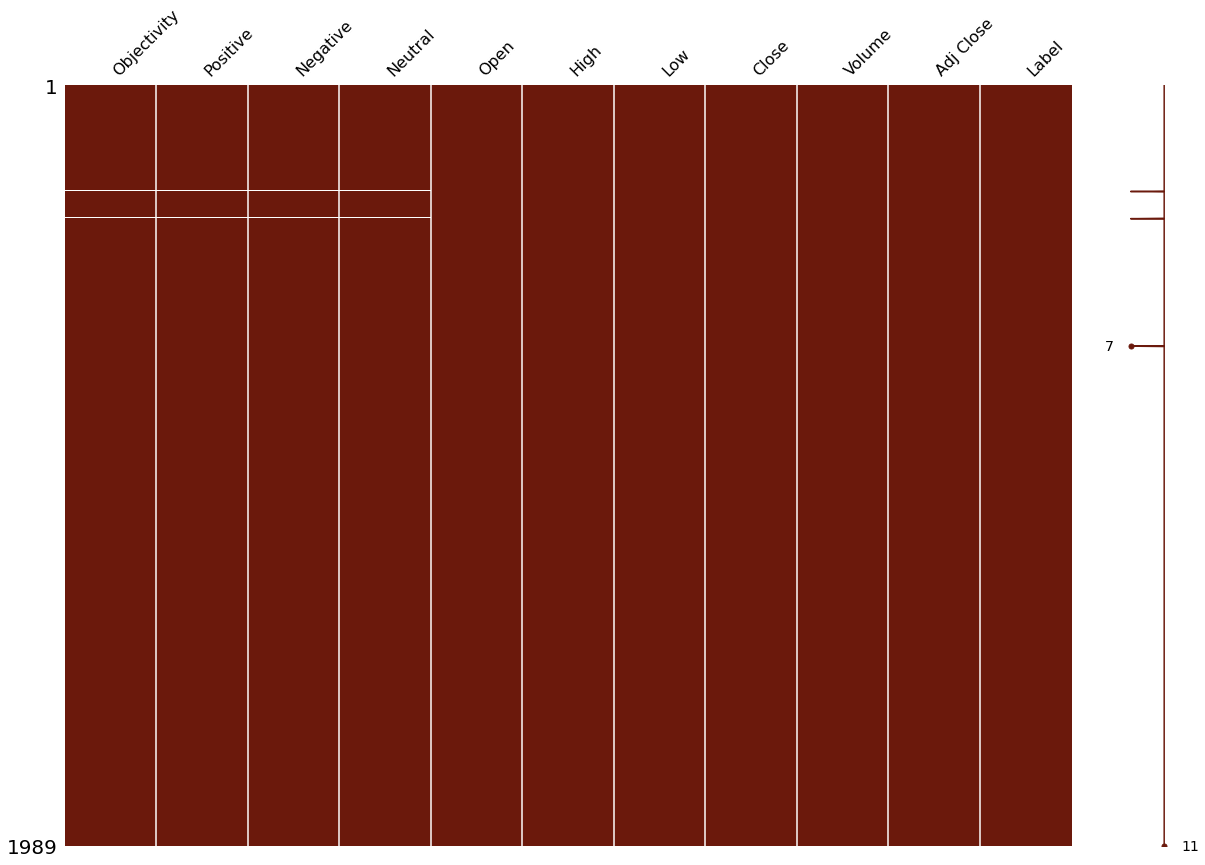

In [119]:
md_copy = merged_dataframe
md_copy = md_copy.replace(-1, np.NaN)
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=md_copy.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

## Correlation Map for features:

#### Now, we will plot a heat map and a scatter matrix to see the correlation of the columns with each other.

#### You can see the heat map with pearson correlation values in the plot below.

#### This gave me a better understanding to see if there are any dependant variables or if any of the variables are highly correlated.

#### Some variables Subjectivity, Objectivity are negatively correlated. There are very few variables which seem to have a very high correlation. Thus, at this point we can conclude that we do not need any sort of dimensionality reduction technique to be applied.

#### Some machine learning algorithms require the predictor variables to not be highly correlated. If the predictors are highly correlated then all of the correlated predictors are basically representing the same correlation and either one or all the variables will have the same effect on the target variable. In such a case dimensionality reduction is required. 

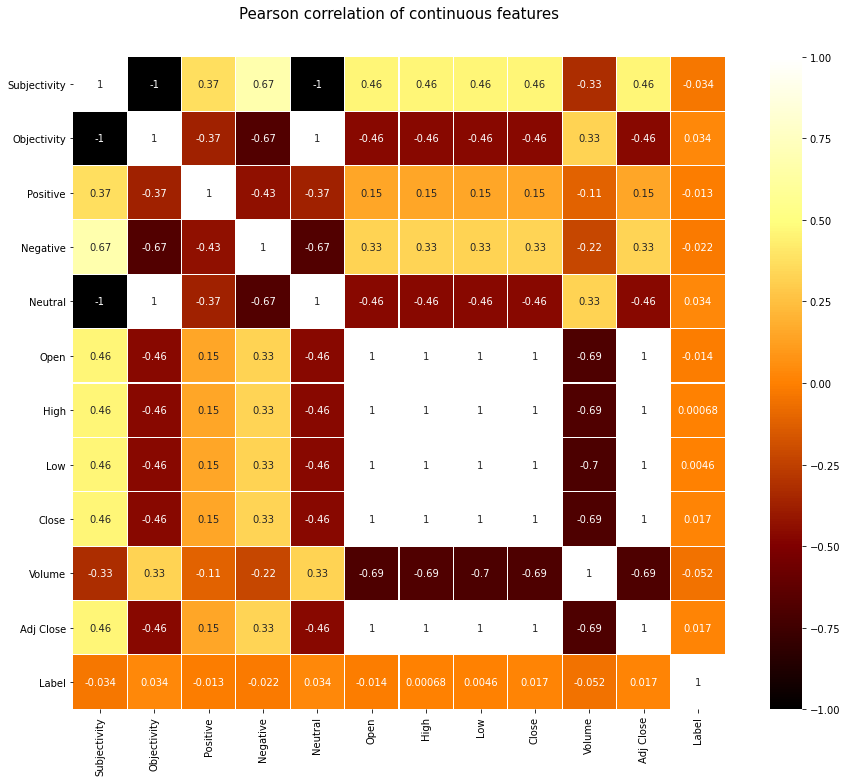

In [120]:
colormap = pyplot.cm.afmhot
pyplot.figure(figsize=(16,12))
pyplot.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(merged_dataframe.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
pyplot.show()

## 4. Training:


#### 接著我們挑選機器學習模型

Logistic Regression

Linear Discriminant Analysis

K Nearest Neighbors

Naive Bayes

Decision trees

Support Vector Classifier

Random Forest Classifier

#### 我們將會分成兩組dataset：
#### 一組是模型比較training:1393 , testing:596
#### 一組是參數微調training:1393, validation set:298 , testing:298

In [121]:
# 查看各資料的資料型態和數量
print(merged_dataframe.count())
# 把NaN數據改為該特徵的平均分數
nan_list = ['Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral']
for col in nan_list:
    merged_dataframe[col] = merged_dataframe[col].fillna(merged_dataframe[col].mean())
#fillna是用在填充NaN數據

Date            1989
Subjectivity    1986
Objectivity     1986
Positive        1986
Negative        1986
Neutral         1986
Open            1989
High            1989
Low             1989
Close           1989
Volume          1989
Adj Close       1989
Label           1989
dtype: int64


### 設置train,test data

Observations: 1989
X Training Observations: 1393
X Testing Observations: 596
y Training Observations: 1393
y Testing Observations: 596


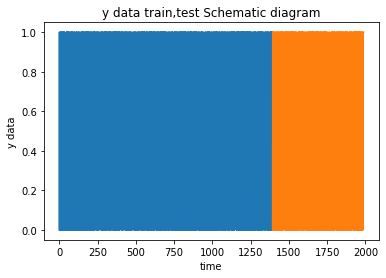

In [124]:
X = merged_dataframe.loc[:,'Subjectivity':'Adj Close']
y = merged_dataframe.loc[:,'Label']


# Split the initial 70% of the data as training set and the remaining 30% data as the testing set
train_size = int(len(X.index) * 0.7)
X_train, X_test = X.loc[0:train_size, :], X.loc[train_size+1: len(X.index), :]
y_train, y_test = y.loc[0:train_size], y.loc[train_size+1: len(X.index)]

print('Observations: %d' % (len(X.index)))
print('X Training Observations: %d' % (len(X_train.index)))
print('X Testing Observations: %d' % (len(X_test.index)))
print('y Training Observations: %d' % (len(y_train)))
print('y Testing Observations: %d' % (len(y_test)))
pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_test])
pyplot.xlabel('time')
pyplot.ylabel('y data')
pyplot.title('y data train,test Schematic diagram')
pyplot.show()
num_folds = 10
scoring = 'accuracy'

### 設置finetune train, validation, test

Observations: 1989
X Training Observations: 1393
X Validation Observations: 298
X Testing Observations: 298
y Training Observations: 1393
y Validation Observations: 298
y Testing Observations: 298


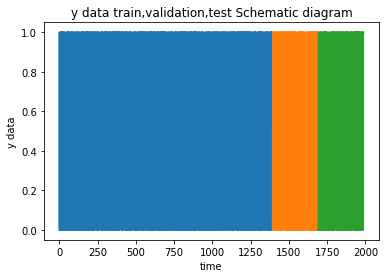

In [126]:
# Separate the dataframe for input(X) and output variables(y)
X = merged_dataframe.loc[:,'Subjectivity':'Adj Close']
y = merged_dataframe.loc[:,'Label']

# Split the initial 70% of the data as training set , 15% of validation set and the remaining 15% data as the testing set
train_size = int(len(X.index) * 0.7)
validation_size = int(len(X.index) * 0.15)

X_train_finetune, X_validation_finetune, X_test_finetune = X.loc[0:train_size, :], X.loc[train_size+1: train_size+validation_size, :],X.loc[train_size+validation_size+1: len(X.index), :]
y_train_finetune, y_validation_finetune, y_test_finetune = y.loc[0:train_size], y.loc[train_size+1: train_size+validation_size], y.loc[train_size+validation_size+1: len(X.index)]

print('Observations: %d' % (len(X.index)))
print('X Training Observations: %d' % (len(X_train_finetune.index)))
print('X Validation Observations: %d' % (len(X_validation_finetune.index)))
print('X Testing Observations: %d' % (len(X_test_finetune.index)))
print('y Training Observations: %d' % (len(y_train_finetune)))
print('y Validation Observations: %d' % (len(y_validation_finetune)))
print('y Testing Observations: %d' % (len(y_test_finetune)))
pyplot.plot(y_train_finetune)
pyplot.plot([None for i in y_train_finetune] + [x for x in y_validation_finetune])
pyplot.plot([None for i in y_train_finetune] + [None for i in y_validation_finetune] + [x for x in y_test_finetune])
pyplot.xlabel('time')
pyplot.ylabel('y data')
pyplot.title('y data train,validation,test Schematic diagram')
pyplot.show()
num_folds = 10
scoring = 'accuracy'

## 這裡發現train切0.6，RF和XGB的效果極差

In [127]:
# Append the models to the models list
models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))
models.append(('RF' , RandomForestClassifier(n_estimators=50)))
models.append(('XGBoost', XGBClassifier()))

In [128]:
# Evaluate each algorithm for accuracy
results = []
names = []


for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accu_score = accuracy_score(y_test, y_pred)
    print(name + ": " + str(accu_score))
    

LR: 0.5302013422818792
LDA: 0.9496644295302014
KNN: 0.4597315436241611
CART: 0.5637583892617449
NB: 0.5318791946308725
SVM: 0.5318791946308725
RF: 0.575503355704698
XGBoost: 0.6040268456375839


## 經過測試我們看到LDA與XGBoost表現良好
## 故我們分別觀察兩者的confusion matrix, classification report

In [135]:
# prepare the model LDA
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledTestX = scaler.transform(X_test)
predictions = model_lda.predict(rescaledTestX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("｜true  p    false n｜")
print("｜false p    true  n｜")
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

accuracy score:
0.9496644295302014
｜true  p    false n｜
｜false p    true  n｜
confusion matrix: 
[[256  24]
 [  6 310]]
classification report: 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       280
           1       0.93      0.98      0.95       316

    accuracy                           0.95       596
   macro avg       0.95      0.95      0.95       596
weighted avg       0.95      0.95      0.95       596



# LDA表現：
## 十分讚

In [134]:
model_xgb = XGBClassifier()
model_xgb.fit(rescaledX, y_train)
# estimate accuracy on test dataset
rescaledTestX = scaler.transform(X_test)
predictions = model_xgb.predict(rescaledTestX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("｜true  p    false n｜")
print("｜false p    true  n｜")
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

accuracy score:
0.6040268456375839
｜true  p    false n｜
｜false p    true  n｜
confusion matrix: 
[[ 84 196]
 [ 40 276]]
classification report: 
              precision    recall  f1-score   support

           0       0.68      0.30      0.42       280
           1       0.58      0.87      0.70       316

    accuracy                           0.60       596
   macro avg       0.63      0.59      0.56       596
weighted avg       0.63      0.60      0.57       596



## 抓到lda ROCcurve的問題在哪裡了
### 原作者忘記將rescaledValidationX = scaler.transform(X_test)
### 新的test data丟入去檢驗
### 故理所當然出來的預測很低

(596,)
roc auc is :0.99500452079566


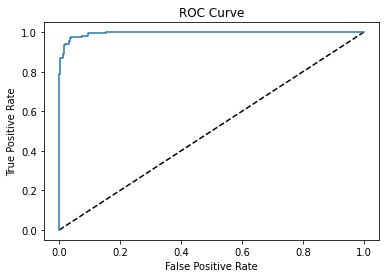

AUC using cross val: [0.99441964 0.99074074 0.98204265 0.98755656 0.99666667 1.
 1.         0.98951049 0.98928571 0.97569444]
Mean AUC score is: 0.9905916908300487


/home/kevinshieh0225/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [29]:
#### In the cell below, we are calculating the AUC score and plotting the ROC AUC curve. This is done to checking if LDA is performing well or not.

#### The curve plots a line and the higher the area under the curved line, the better the model.

#### We can see below that the AUC score is 0.5 and the under the curve as seen is about 50%. This score is worthless and and explains that the LDA is badly trained. The AUC score has to be more than 0.5 and the higher the score, the better the performance. A score of 0.5 only shows that LDA is a worthless model.

# Generating the ROC curve
y_pred_proba = model_lda.predict_proba(rescaledTestX)[:,1]
print(y_pred_proba.shape)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
print("roc auc is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

# AUC score using cross validation
kfold_val = KFold(n_splits=num_folds, random_state=42)
auc_score = cross_val_score(model_lda, rescaledTestX, y_test, cv=kfold_val, scoring='roc_auc')
"""
    #這裡的cross_val可以丟X_validation嗎
    #

"""

    
print("AUC using cross val: " + str(auc_score))
mean_auc = np.mean(auc_score)
print("Mean AUC score is: " + str(mean_auc))

roc auc is :0.6409697106690777


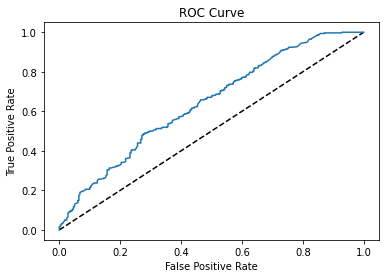

/home/kevinshieh0225/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



AUC using cross val: [0.88058036 0.77025463 0.93995511 0.91176471 0.97666667 0.96273637
 0.97126437 0.95454545 0.96785714 0.9525463 ]
Mean AUC score is: 0.9288171101206875


In [30]:
y_pred_proba = model_xgb.predict_proba(rescaledTestX)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
print("roc auc is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

# AUC score using cross validation
kfold_val = KFold(n_splits=num_folds, random_state=42)
auc_score = cross_val_score(model_xgb, rescaledTestX, y_test, cv=kfold_val, scoring='roc_auc')
print("AUC using cross val: " + str(auc_score))
mean_auc = np.mean(auc_score)
print("Mean AUC score is: " + str(mean_auc))

## 5. Feature Importances:

### 順著原作者錯誤的脈絡，他選擇在這裡找出xgb和rf的關鍵特徵，透過減少特徵的方式，想看看預測結果會如何
### LDA本身並沒有這個關鍵特徵的方法，因為LDA的原理是透過降維的方式來最大分散化資料，以找到好的分類結果。

In [130]:
#刪除"Label"這行column(axis=1)
features = merged_dataframe.drop(['Label'],axis=1).columns.values
#print(features.shape())
print(features)
#feature_importances_是排列xgb的特徵重要度評分
x, y = (list(x) for x in zip(*sorted(zip(model_xgb.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Feature importance for XGBoost',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances for XGBoost',
     width = 1000, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')


['Date' 'Subjectivity' 'Objectivity' 'Positive' 'Negative' 'Neutral'
 'Open' 'High' 'Low' 'Close' 'Volume' 'Adj Close']


#### Below is the feature importance graph for Random Forests.

#### This is just to see the sample important features for Random Forests. We are not going to use Random Forests for further tuning our model.

In [131]:
x, y = (list(x) for x in zip(*sorted(zip(model_rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Feature importance for Random Forests',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances for Random Forests',
     width = 1000, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')


## Fine Tuning XGBoost

#### As of now the model that seems to be performing the best is the XGBoost model.

#### Lets see if we can fine tune it further to increase the accuracy of the model.

#### The main parameters which can be used for fine tuning the XGBoost model are the n_estimators and the max_depth parameters.

#### n_estimators: XGBoost is an additive model, multiple models are created on different samples of data and the model learns after training of different samples. How many samples are the optimum best for the XGBoost to train from is usually unknown and the best way to find out is to check by training on different set of estimators.

#### Lets take a list of n_estimators = [150, 200, 250, 450, 500, 550, 1000]

#### max_depth: XGBoost learns in the form of a tree model and the number of depths for that tree needs to be set. This parameter is also not known. So lets try on multiple set of depths.
#### max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#### Below , we are training the XGBoost classifier on different combinations of max depth and estimators. This output will print out the  best parameters as well as the highest accuracy achieved using those parameters.

#### Below we can see that the accuracy has improved by around ~5%, i. e from 58% to 62% at 550 estimators and max depth of 3.

In [34]:
# XGBoost on Stock Price dataset, Tune n_estimators and max_depth
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib

matplotlib.use('Agg')
model = XGBClassifier()
n_estimators = [150, 200, 250, 450, 500, 550, 1000]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
print(max_depth)
best_depth = 0
best_estimator = 0
max_score = 0
for n in n_estimators:
    for md in max_depth:
        model = XGBClassifier(n_estimators=n, max_depth=md)
        model.fit(X_train_finetune, y_train_finetune)
        y_pred = model.predict(X_validation_finetune)
        score = accuracy_score(y_validation_finetune, y_pred)
        if score > max_score:
            max_score = score
            best_depth = md
            best_estimator = n
        print("Score is " + str(score) + " at depth of " + str(md) + " and estimator " + str(n))
print("Best score is " + str(max_score) + " at depth of " + str(best_depth) + " and estimator of " + str(best_estimator))

model = XGBClassifier(n_estimators=best_estimator, max_depth=best_depth)
model.fit(X_train_finetune, y_train_finetune)
y_pred = model.predict(X_test_finetune)
score = accuracy_score(y_test_finetune, y_pred)
    
print("the best estimator score in test data is"+str(score))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Score is 0.5738255033557047 at depth of 1 and estimator 150
Score is 0.6073825503355704 at depth of 2 and estimator 150
Score is 0.6040268456375839 at depth of 3 and estimator 150
Score is 0.6208053691275168 at depth of 4 and estimator 150
Score is 0.6208053691275168 at depth of 5 and estimator 150
Score is 0.6241610738255033 at depth of 6 and estimator 150
Score is 0.5838926174496645 at depth of 7 and estimator 150
Score is 0.6073825503355704 at depth of 8 and estimator 150
Score is 0.5805369127516778 at depth of 9 and estimator 150
Score is 0.6040268456375839 at depth of 10 and estimator 150
Score is 0.5503355704697986 at depth of 11 and estimator 150
Score is 0.5973154362416108 at depth of 12 and estimator 150
Score is 0.5738255033557047 at depth of 1 and estimator 200
Score is 0.6073825503355704 at depth of 2 and estimator 200
Score is 0.6140939597315436 at depth of 3 and estimator 200
Score is 0.6241610738255033 at depth of 4 and estimator 2

## Fine tuning with important features:

#### As explained earlier in the feature importance plot section, lets use the most important features and see if it improves the accuracy of the model.

#### After training using the most important features, we do not see much improvement in our model. Hence, lets not use that in further tuning. The model accuracy still remains at 62%

In [35]:
imp_features_df = merged_dataframe[['Low', "Neutral", 'Close', 'Objectivity', 'High','Positive']]
X = imp_features_df.loc[:,'Low':'Positive']
print(X.head())

            Low    Neutral         Close  Objectivity          High   Positive
0  11388.040039  14.285714  11734.320312    14.285714  11759.959961  21.428571
1  11675.530273  22.222222  11782.349609    22.222222  11867.110352  33.333333
2  11601.519531  50.000000  11642.469727    50.000000  11782.349609  14.285714
3  11453.339844  60.000000  11532.959961    60.000000  11633.780273  20.000000
4  11450.889648  54.545455  11615.929688    54.545455  11718.280273  36.363636


In [133]:
Xi_train, Xi_test = X.loc[0:train_size, :], X.loc[train_size+1: len(X.index), :]

clf = XGBClassifier(n_estimators=200, max_depth=6)
clf.fit(Xi_train, y_train)
yi_pred = clf.predict(Xi_test)

print("accuracy score:")
print(accuracy_score(y_test, yi_pred))
print("｜true  p    false n｜")
print("｜false p    true  n｜")
print("confusion matrix: ")
print(confusion_matrix(y_test, yi_pred))
print("classification report: ")
print(classification_report(y_test, yi_pred))

accuracy score:
0.6090604026845637
｜true  p    false n｜
｜false p    true  n｜
confusion matrix: 
[[116 164]
 [ 69 247]]
classification report: 
              precision    recall  f1-score   support

           0       0.63      0.41      0.50       280
           1       0.60      0.78      0.68       316

    accuracy                           0.61       596
   macro avg       0.61      0.60      0.59       596
weighted avg       0.61      0.61      0.59       596



## 抽出高重要性特徵，測試分數變低
### all feature  XGBmodel test score：0.603
### top 6 important feature XGBmodel test score：0.576




## PCA transformation:
    
### PCA主成分分析，是另一種透過降維方式來協助機器學習的手段，不同的是LDA是監督式學習

### In the below model, lets reduce the dimension of the data down to 3 and then train it using XGBoost to see if the performance is improved. PCA reduces the dimensions of the data, however it preserves the data from all columns, it only does the job of bringing down all the dimensions to 2-3 dimensions. The main dimension will be the dimension with highest amount of variance, i.e the spread of data.

In [40]:
from sklearn.decomposition import PCA

X = merged_dataframe.loc[:,'Subjectivity':'Adj Close']
y = merged_dataframe.loc[:,'Label']

pca = PCA(n_components=3)#主成分的維數
pca.fit(X)
transformed = pca.transform(X)

transformed.shape
print(type(transformed))

<class 'numpy.ndarray'>


## 在PCA處理data後

## 我們的xgboost在test data得到94%accuracy

In [41]:
pca_df = pd.DataFrame(transformed)

X_train_pca, X_test_pca = pca_df.loc[0:train_size, :], pca_df.loc[train_size+1: len(X.index), :]

X_train_pca_finetune, X_validation_pca_finetune, X_test_pca_finetune = pca_df.loc[0:train_size, :], pca_df.loc[train_size+1: train_size+validation_size, :],pca_df.loc[train_size+validation_size+1: len(X.index), :]

clf = XGBClassifier(n_estimators=200, max_depth=6)
clf.fit(X_train_pca, y_train)
y_pred_pca = clf.predict(X_test_pca)
score = accuracy_score(y_test, y_pred_pca)
print("Score is "+ str(score))


Score is 0.9412751677852349


#### However, as explained earlier, we cannot totally rely on the accuracy score to be the most acurate test of the model . Lets take a look at the confusion matrix as well as the classification report.

#### The confusion matrix looks good as we have a good number of true positives and true negatives.
#### The top left corner is the true positive and the bottom right corner of the matrix is the true negatives.
#### True Positive: No. of predictions which are positive and are actually positive.
#### True Negative: No. of predictions which are negative and are actually negative.
#### The bottom left and top right are false positive and false negative. We can see that the number of false positive's and false negative's are quite low. Thus we can say that the predictions performed by the model is very good.

｜true  p    false n｜
｜false p    true  n｜
#### The precision, recal and f1 score is also very good.
## Precision is 0.94
## Recall is 0.94
## f1-score is 0.94

In [132]:
pca_matrix = confusion_matrix(y_test, y_pred_pca)
pca_report = classification_report(y_test, y_pred_pca)
print("｜true  p    false n｜")
print("｜false p    true  n｜")
print("Confusion Matrix: \n" + str(pca_matrix))
print("Classification report: \n" + str(pca_report))

｜true  p    false n｜
｜false p    true  n｜
Confusion Matrix: 
[[261  19]
 [ 13 303]]
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       280
           1       0.94      0.96      0.95       316

    accuracy                           0.95       596
   macro avg       0.95      0.95      0.95       596
weighted avg       0.95      0.95      0.95       596



#### Finally, lets check the Area Under the Curve by plotting the ROC AUC curve.

#### After plotting the curve , we can observe that the AUC score is 0.98 having around 98% area under the curve which is amazing.

## This suggests that our model is performing good at an accuracy of 94%.
## This can further be used to predict the Stock Prices.
## We are going to need top 25 headlines. These headlines can be parsed to generate the polarity data and use the stock prices to predict the Stock Prices.

AUC score is 0.9858103526220615
roc auc is :0.9858103526220615


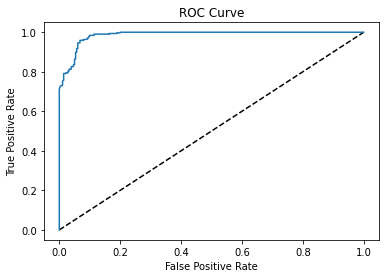

In [44]:
# Generating the ROC curve
y_pred_proba_pca = clf.predict_proba(X_test_pca)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca)
roc_auc = auc(fpr, tpr)
print("AUC score is " + str(roc_auc))

# Plot ROC curve
print("roc auc is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()


# 在pca主成分分析後續實驗：
## 1.研究各模型在pca數據調整後的表現情形
## 2.不同主成分下XGboost的表現狀況

# 先來嘗試(1)

In [45]:
# Evaluate each algorithm for accuracy
models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))
models.append(('RF' , RandomForestClassifier(n_estimators=50)))
models.append(('XGBoost', XGBClassifier(n_estimators=200, max_depth=6)))
results = []
names = []

for name, model in models:
    clf = model
    clf.fit(X_train_pca, y_train)
    y_pred_pca = clf.predict(X_test_pca)
    accu_score = accuracy_score(y_test, y_pred_pca)
    print(name + ": " + str(accu_score))

LR: 0.5419463087248322
LDA: 0.9261744966442953
KNN: 0.4597315436241611
CART: 0.8909395973154363
NB: 0.535234899328859
SVM: 0.5335570469798657
RF: 0.9446308724832215
XGBoost: 0.9463087248322147


### 我們比較一下未使用PCA處理的結果：
          原先的accuracy      使用PCA後的accuracy
    LR:   0.5309882747068677  0.5419463087248322
    LDA:  0.949748743718593   0.9261744966442953
    KNN:  0.45896147403685095 0.4597315436241611
    CART: 0.5561139028475712  0.889261744966443
    NB:   0.5326633165829145  0.535234899328859
    SVM:  0.5326633165829145  0.5335570469798657
    RF:   0.576214405360134   0.9429530201342282
    XGB:  0.6046901172529313  0.9463087248322147
   
         原先的accuracy      使用PCA後的accuracy
    LR   0.531               0.542 
    LDA  0.950               0.926 Down
    KNN  0.459               0.460 
    CART 0.556               0.889 Up
    NB   0.533               0.535 
    SVM  0.533               0.534 
    RF   0.576               0.943 Up
    XGB  0.605               0.946 Up

### CART、RF、XGB有顯著上升；原先表現最好的LDA下降

# 嘗試 (2)

In [107]:
X = merged_dataframe.loc[:,'Subjectivity':'Adj Close']
y = merged_dataframe.loc[:,'Label']

model = XGBClassifier()

n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

best_components = 0
max_score = 0

for n in n_components:
    #PCA處理
    pca = PCA(n_components=n)#主成分的維數
    pca.fit(X)
    transformed = pca.transform(X)
    pca_df = pd.DataFrame(transformed)
    X_train_pca_finetune, X_validation_pca_finetune, X_test_pca_finetune = pca_df.loc[0:train_size, :], pca_df.loc[train_size+1: train_size+validation_size, :],pca_df.loc[train_size+validation_size+1: len(X.index), :]
    #
    #帶入RF model
    model.fit(X_train_pca_finetune, y_train_finetune)
    y_pred = model.predict(X_validation_pca_finetune)
    score = accuracy_score(y_validation_finetune, y_pred)
    if score > max_score:
        max_score = score
        best_components = n
    print("Score is " + str(score) + " at components of " + str(n))
print("Best score is " + str(max_score) + " at components of " + str(best_components))

pca = PCA(n_components=best_components)#主成分的維數
pca.fit(X)
transformed = pca.transform(X)
pca_df = pd.DataFrame(transformed)
X_train_pca_finetune, X_validation_pca_finetune, X_test_pca_finetune = pca_df.loc[0:train_size, :], pca_df.loc[train_size+1: train_size+validation_size, :],pca_df.loc[train_size+validation_size+1: len(X.index), :]
model.fit(X_train_pca_finetune, y_train_finetune)
y_pred = model.predict(X_test_pca_finetune)
score = accuracy_score(y_test_finetune, y_pred)

print("Best pca components of score in test data is " + str(score))


Score is 0.4697986577181208 at components of 1
Score is 0.4966442953020134 at components of 2
Score is 0.9563758389261745 at components of 3
Score is 0.9463087248322147 at components of 4
Score is 0.9429530201342282 at components of 5
Score is 0.9664429530201343 at components of 6
Score is 0.9731543624161074 at components of 7
Score is 0.9697986577181208 at components of 8
Score is 0.9664429530201343 at components of 9
Score is 0.9664429530201343 at components of 10
Score is 0.9697986577181208 at components of 11
Best score is 0.9731543624161074 at components of 7
Best pca components of score in test data is 0.9630872483221476


### 以XGB model測試後在components 於n = 8時有最佳accuracy
### 接著我們看看在PCA n = 8 之下，finetune xgb的最佳結果為何？

In [108]:
# XGBoost on Stock Price dataset, Tune n_estimators and max_depth
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib

matplotlib.use('Agg')
model = XGBClassifier()
n_estimators = [150, 200, 250, 450, 500, 550, 1000]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
print(max_depth)
best_depth = 0
best_estimator = 0
max_score = 0

for n in n_estimators:
    for md in max_depth:
        model = XGBClassifier(n_estimators=n, max_depth=md)
        model.fit(X_train_pca_finetune, y_train_finetune)
        y_pred = model.predict(X_validation_pca_finetune)
        score = accuracy_score(y_validation_finetune, y_pred)
        if score > max_score:
            max_score = score
            best_depth = md
            best_estimator = n
        print("Score is " + str(score) + " at depth of " + str(md) + " and estimator " + str(n))
print("Best score is " + str(max_score) + " at depth of " + str(best_depth) + " and estimator of " + str(best_estimator))

model = XGBClassifier(n_estimators=best_estimator, max_depth=best_depth)
model.fit(X_train_pca_finetune, y_train_finetune)
y_pred = model.predict(X_test_pca_finetune)
score = accuracy_score(y_test_finetune, y_pred)
    
print("the best estimator score in test data is"+str(score))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Score is 0.9731543624161074 at depth of 1 and estimator 150
Score is 0.9798657718120806 at depth of 2 and estimator 150
Score is 0.9765100671140939 at depth of 3 and estimator 150
Score is 0.9765100671140939 at depth of 4 and estimator 150
Score is 0.9731543624161074 at depth of 5 and estimator 150
Score is 0.9731543624161074 at depth of 6 and estimator 150
Score is 0.9697986577181208 at depth of 7 and estimator 150
Score is 0.9697986577181208 at depth of 8 and estimator 150
Score is 0.9731543624161074 at depth of 9 and estimator 150
Score is 0.9731543624161074 at depth of 10 and estimator 150
Score is 0.9731543624161074 at depth of 11 and estimator 150
Score is 0.9731543624161074 at depth of 12 and estimator 150
Score is 0.9697986577181208 at depth of 1 and estimator 200
Score is 0.9798657718120806 at depth of 2 and estimator 200
Score is 0.9765100671140939 at depth of 3 and estimator 200
Score is 0.9765100671140939 at depth of 4 and estimator 2

## 另外我好奇，如果預測的不是當天股票，而是隔天的呢？基於實用性原則，我們還是得對未來做預測才有意義，然而透過文獻，時間越久新聞對股票的影響性越小，這似乎對我們不利。所以我們來看看效果

In [68]:
try_set = pd.DataFrame(['0' , '1' , '2', '3'])
try_set_1 = try_set.loc[0:len(try_set)-2]
print(try_set_1)

   0
0  0
1  1
2  2


In [59]:
X_train_pca_tommorrow, X_test_pca_tommorrow = pca_df.loc[0:train_size, :], pca_df.loc[train_size+1: len(pca_df.index)-2, :]
y_train_tommorrow,  y_test_tommorrow = y.loc[1:train_size+1], y.loc[train_size+2: len(pca_df.index)-1]
print(pca_df.shape)
print(len(pca_df.index))
print(str(train_size))
print(str(len(pca_df.index)))
print(str())
print(str())
print(X_train_pca_tommorrow.shape)
print(X_test_pca_tommorrow.shape)
print(y_train_tommorrow.shape)
print(y_test_tommorrow.shape)




model = XGBClassifier(n_estimators=200, max_depth=6)
model.fit(X_train_pca_tommorrow, y_train_tommorrow)
y_pred = model.predict(X_test_pca_tommorrow)
score = accuracy_score(y_test_tommorrow, y_pred)
print("XGB with pca(n=8): " + str(score))

(1989, 8)
1989
1392
1989


(1393, 8)
(595, 8)
(1393,)
(595,)
XGB with pca(n=8): 0.5092436974789916


In [70]:
X_train_tommorrow, X_test_tommorrow = X.loc[0:train_size, :], X.loc[train_size+1: len(X.index)-2, :]
y_train_tommorrow, y_test_tommorrow = y.loc[1:train_size+1], y.loc[train_size+2: len(X.index)-1]

# Evaluate each algorithm for accuracy
results = []
names = []

models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))
models.append(('RF' , RandomForestClassifier(n_estimators=50)))
models.append(('XGBoost', XGBClassifier(n_estimators=200, max_depth=6)))

for name, model in models:
    clf = model
    clf.fit(X_train_tommorrow, y_train_tommorrow)
    y_pred = clf.predict(X_test_tommorrow)
    accu_score = accuracy_score(y_test_tommorrow, y_pred)
    print(name + ": " + str(accu_score))


LR: 0.5310924369747899
LDA: 0.5126050420168067
KNN: 0.47394957983193275
CART: 0.4789915966386555
NB: 0.5294117647058824
SVM: 0.5327731092436975
RF: 0.4722689075630252
XGBoost: 0.5210084033613446


## 所有的預測皆嚴重下滑。這似乎呼應我們在文獻得知的，新聞影響力是短時間性的。然而我們不禁想，是否有其他因素導致我們只能對當日新聞做出有效的預測？

# 再來我想測試一個新的內容：
# 當我拿掉close,volume的數據時，模型的測驗效果如何？
## 拿掉close的特徵也符合實際情況：我們若要做當天收盤買賣，理應不知道收盤的數值的

In [79]:
imp_features_df = merged_dataframe[['Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral', 'Open', 'High', 'Low', 'Volume']]
#imp_features_df = merged_dataframe[['Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral', 'Open', 'High', 'Low', 'Volume']]
X_real = imp_features_df.loc[:,'Subjectivity':'Low']

X_train_real, X_test_real = X_real.loc[0:train_size, :], X_real.loc[train_size+1: len(X.index)-1, :]
y_train_real, y_test_real = y.loc[0:train_size], y.loc[train_size+1: len(X.index)-1]

results = []
names = []

models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))
models.append(('RF' , RandomForestClassifier(n_estimators=50)))
models.append(('XGBoost', XGBClassifier(n_estimators=200, max_depth=6)))

for name, model in models:
    clf = model
    clf.fit(X_train_real, y_train_real)
    y_pred = clf.predict(X_test_real)
    accu_score = accuracy_score(y_test_real, y_pred)
    print(name + ": " + str(accu_score))

LR: 0.8741610738255033
LDA: 0.8624161073825504
KNN: 0.5369127516778524
CART: 0.5922818791946308
NB: 0.4966442953020134
SVM: 0.5302013422818792
RF: 0.4899328859060403
XGBoost: 0.5738255033557047


### 測試pca+xgb

In [82]:
pca = PCA(n_components=best_components)#主成分的維數
pca.fit(X_real)
transformed = pca.transform(X_real)
pca_df = pd.DataFrame(transformed)
X_train_pca_real, X_test_pca_real = pca_df.loc[0:train_size, :], pca_df.loc[train_size+1: len(X.index)-1, :]
y_train_pca_real, y_test_pca_real = y.loc[0:train_size], y.loc[train_size+1: len(X.index)-1]

model = XGBClassifier(n_estimators=200, max_depth=6)
model.fit(X_train_pca_real, y_train_pca_real)
y_pred = model.predict(X_test_pca_real)
accu_score = accuracy_score(y_test_pca_real, y_pred)
print(name + ": " + str(accu_score))

XGBoost: 0.8557046979865772


## 由此可見logistic regression的分數明顯上升，而LDA在此的表現下降。

## 我們再使用PCA轉換後搭配XGBoost，在此得到了0.856的預測準度。


## 比較各數值：
    LR 0.859 0.553
    LDA 0.852 0.932
    KNN 0.510 0.473
    CART 0.600 0.587
    NB 0.506 0.550
    SVM 0.553 0.550
    RF 0.503 0.546
    XGB 0.614 0.617

## 最後我們抽取掉新聞情感分析的五項特徵，只以K線資訊預測當日走勢，試圖了解新聞情感分析佔本次實驗的影響重要性程度：

In [88]:
imp_features_df = merged_dataframe[[ 'Open', 'High', 'Low','Volume','Close']]
X_real = imp_features_df.loc[:,'Open':'Close']
print(X_real.shape)

X_train_real, X_test_real = X_real.loc[0:train_size, :], X_real.loc[train_size+1: len(X.index)-1, :]
y_train_real, y_test_real = y.loc[0:train_size], y.loc[train_size+1: len(X.index)-1]

results = []
names = []

models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))
models.append(('RF' , RandomForestClassifier(n_estimators=50)))
models.append(('XGBoost', XGBClassifier(n_estimators=200, max_depth=6)))

for name, model in models:
    clf = model
    clf.fit(X_train_real, y_train_real)
    y_pred = clf.predict(X_test_real)
    accu_score = accuracy_score(y_test_real, y_pred)
    print(name + ": " + str(accu_score))

(1989, 5)
LR: 0.5302013422818792
LDA: 0.9546979865771812
KNN: 0.4597315436241611
CART: 0.5922818791946308
NB: 0.5302013422818792
SVM: 0.5335570469798657
RF: 0.5838926174496645
XGBoost: 0.5671140939597316


## 我們發現LDA仍然維持極高的水準，而比較原本的預測結果發現，其實差別不大，由此得知我們本次實驗雖欲證明新聞文本sentiment analysis能在股票預測有好的表現，但結果不盡人意，sentiment analysis的特徵的影響性微乎其微。